# Part 1 - Data Processing

In [1]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
#Importing the training set
training_set=pd.read_csv('Google_Stock_Price_Train.csv')

In [8]:
#we will be predicting the opening price
#just read the column index 1, and since we need a matrix 1:2
training_set=training_set.iloc[:,1:2].values

In [9]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
training_set=sc.fit_transform(training_set)

In [13]:
#getting the inputs and the outputs
#we will be predicting the stock price at time t+1, given the stock price at time t
X_train = training_set[0:1257] # all the stock prices except last one
y_train = training_set[1:1258] # predictions,shift the locations by 1

In [14]:
# Reshaping
#changing the format to a 3D array to store time step
#why we need reshaping? keras expects a 3d array, refer doc.
# no of observations, timestep, features
X_train=np.reshape(X_train,(1257,1,1))

# Part 2 - Buidling the RNN

In [19]:
# Importing libraries
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [20]:
# Initialising the RNN
regressor = Sequential()

In [21]:
# Adding the input layer and the LSTM layer
#units -> no of memory units
#input_shape -> (timestep,no of features) , None= any timestap
regressor.add(LSTM(units=4,input_shape= (None,1),activation='sigmoid' ))

In [22]:
#adding the output layer
regressor.add(Dense(units=1))

In [23]:
#compiling the RNN

In [24]:
#optimizer, most of the cases rmsprop is recommended with RNN
#loss, eince we are performing a regression, mean squared error
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
# Fitting the RNN to the Training set
regressor.fit(X_train,y_train,batch_size=32,epochs=200)

Epoch 1/200
1257/1257 [==============================] - 0s - loss: 0.1219     
Epoch 2/200
1257/1257 [==============================] - 0s - loss: 0.0860     
Epoch 3/200
1257/1257 [==============================] - 0s - loss: 0.0708     
Epoch 4/200
1257/1257 [==============================] - 0s - loss: 0.0654     
Epoch 5/200
1257/1257 [==============================] - 0s - loss: 0.0631     
Epoch 6/200
1257/1257 [==============================] - 0s - loss: 0.0613     
Epoch 7/200
1257/1257 [==============================] - 0s - loss: 0.0597     
Epoch 8/200
1257/1257 [==============================] - 0s - loss: 0.0579     
Epoch 9/200
1257/1257 [==============================] - 0s - loss: 0.0561     
Epoch 10/200
1257/1257 [==============================] - 0s - loss: 0.0542     
Epoch 11/200
1257/1257 [==============================] - 0s - loss: 0.0523     
Epoch 12/200
1257/1257 [==============================] - 0s - loss: 0.0503     
Epoch 13/200
1257/1257 [=============

1257/1257 [==============================] - 0s - loss: 2.4982e-04     
Epoch 195/200
1257/1257 [==============================] - 0s - loss: 2.5150e-04     
Epoch 196/200
1257/1257 [==============================] - 0s - loss: 2.4747e-04     
Epoch 197/200
1257/1257 [==============================] - 0s - loss: 2.4777e-04     
Epoch 198/200
1257/1257 [==============================] - 0s - loss: 2.4758e-04     
Epoch 199/200
1257/1257 [==============================] - 0s - loss: 2.4766e-04     - ETA: 0s - loss: 2.4974e-0
Epoch 200/200
1257/1257 [==============================] - 0s - loss: 2.4699e-04     


# Part 3 - Making the Predictions and Visualizing the results

In [26]:
# Getting the real stock price of 2017
test_set=pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price=test_set.iloc[:,1:2].values

In [27]:
inputs=real_stock_price
inputs=sc.transform(inputs)
inputs=np.reshape(inputs,(20,1,1))

In [28]:
predicted_stock_price=regressor.predict(inputs)

In [29]:
#apply inverse transformations to get the actual price
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

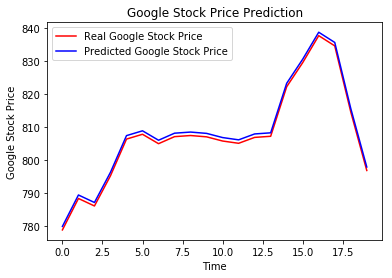

In [30]:
#visualizing the results
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()

# Part 4 - Evaluating the RNN

In [40]:
import math
from sklearn.metrics import mean_squared_error

In [41]:
rmse=math.sqrt(mean_squared_error(real_stock_price,predicted_stock_price))

In [43]:
#percentage error
#average price is around 800
rmse/800

0.0013123032648494723